/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


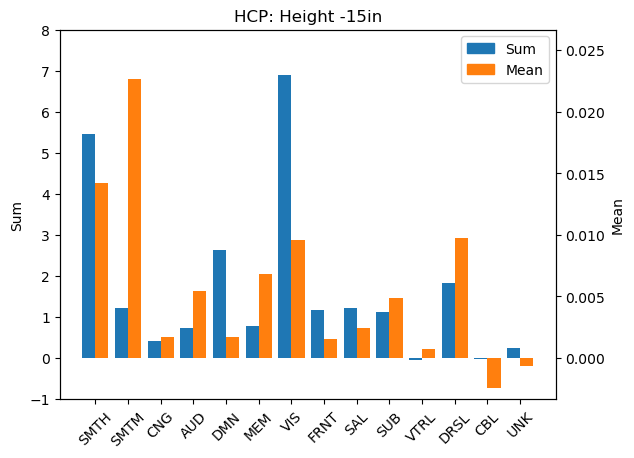

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
import matplotlib.patches as mpatches

labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def makefig(title, sums, means, lim, hcpukb):
    fig, ax = plt.subplots(1,1)

    ax.bar(labels, sums, width=-0.4, align='edge')
    ax0 = ax.twinx()
    ax0.bar(labels, means, width=0.4, align='edge', color='tab:orange')
    ax.set_xticklabels(labels, rotation=45)

    lim = np.array(lim)
    ax.set_ylim(lim)
    ax0.set_ylim(lim/300)

    ax.set_ylabel('Sum')
    ax0.set_ylabel('Mean')

    handles = [mpatches.Patch(color='tab:blue', label='Sum'), 
               mpatches.Patch(color='tab:orange', label='Mean')]

    ax.set_title(title)
    ax.legend(handles=handles)

    tit2 = title.replace(' ', '_')
    
    fig.show()
    fig.savefig(f'/home/anton/Documents/Yale/{hcpukb}/Figures/FCChanges2/networks_{tit2}.pdf')

title = 'HCP: Height -15in'
sums = '''5.452512121424573
1.2082162182915712
0.40857156505567993
0.7374966577839116
2.6202313105895825
0.7691065749199079
6.884242331122571
1.1794161650332835
1.2158727767542046
1.1258425642921213
-0.046868570672973696
1.8364647704620018
-0.025126808280161037
0.25421339196078974
'''.split()
sums = [float(s) for s in sums]
means = '''0.01418410772748364
0.022656263206238432
0.0016804403466162993
0.005403077255260704
0.0017069655841686234
0.006789259439827541
0.009605268652484325
0.0015674788546971086
0.0024677697760717857
0.004869513296576694
0.000773546945668056
0.009740770069514553
-0.002442338754473054
-0.0006531611338244942
'''.split()
means = [float(m) for m in means]
lim = [-1, 8]

makefig(title, sums, means, lim, 'HCP')

In [5]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

network_dct = {'DMN': 'tab:blue', 'VIS': 'tab:orange', 'SUB': 'tab:green', 'UNK': 'tab:red', 'FRNT': 'tab:purple', 
               'DRSL': 'tab:brown', 'AUD': 'tab:pink', 'MEM': 'tab:grey', 'SMTH': 'tab:olive', 'SMTM': 'tab:cyan',
              'CNG': 'lightcoral', 'SAL': 'bisque', 'VTRL': 'lightsteelblue', 'CBL': 'orchid'}


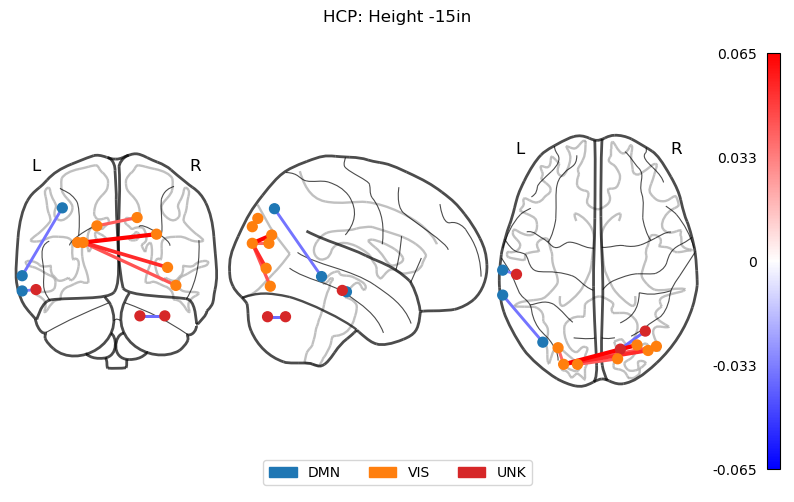

In [8]:
import nilearn

rois = nilearn.datasets.fetch_coords_power_2011()['rois']

def makefigedges(title, top_edges, hcpukb):
    rois_set = set()
    nets_set = set()
    top_edges = top_edges.split('\n')
    
    for i in range(len(top_edges)):
        ep = top_edges[i].split()
        ep[1] = ours2orig[int(ep[1])]
        ep[2] = ours2orig[int(ep[2])]
        ep[3] = network_dct[ep[3]]
        ep[4] = network_dct[ep[4]]
        nets_set.add(ep[3])
        nets_set.add(ep[4])
        ep[5] = float(ep[5])
        rois_set.add(ep[1])
        rois_set.add(ep[2])
        top_edges[i] = ep
        
    rois_list = list(rois_set)
    nrois = len(rois_list)
    coords = np.zeros((nrois, 3))
    adj_mat = np.zeros((nrois, nrois))
    colors = [None]*nrois
    
    for e in top_edges:
        i1 = rois_list.index(e[1])
        i2 = rois_list.index(e[2])
        adj_mat[i1,i2] = e[5]
        adj_mat[i2,i1] = e[5]
        c1 = rois.iloc[e[1]]
        c2 = rois.iloc[e[2]]
        coords[i1] = (c1.x, c1.y, c1.z)
        coords[i2] = (c2.x, c2.y, c2.z)
        colors[i1] = e[3]
        colors[i2] = e[4]

    fig, ax = plt.subplots(1,1,figsize=(10,6))
    plotting.plot_connectome(adj_mat, coords, colors, colorbar=True, axes=ax)
    handles = [mpatches.Patch(color=v, label=k) for k,v in network_dct.items() if v in nets_set]
    ax.legend(handles=handles, ncol=3, loc='lower center')
    ax.set_title(title)
    fig.show()

    tit2 = title.replace(' ', '_')
    
    # fig.savefig(f'/home/anton/Documents/Yale/{hcpukb}/Figures/FCChanges2/edges_{tit2}.pdf')

title = 'HCP: Height -15in'
top_edges = '''25945 131 139 VIS VIS 0.06527285113674382
25961 131 155 VIS VIS 0.05405828213169776
25941 131 135 VIS VIS 0.043810525440910957
26715 137 138 VIS VIS 0.041523620524248545
25672 129 131 VIS VIS 0.03838451457955425
34688 256 257 UNK UNK -0.03754314770308711
16603 73 106 DMN DMN -0.03520104544541125
16364 71 248 DMN UNK -0.03246998016622929'''

makefigedges(title, top_edges, 'HCP')

/tmp/ipykernel_197948/2254211928.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


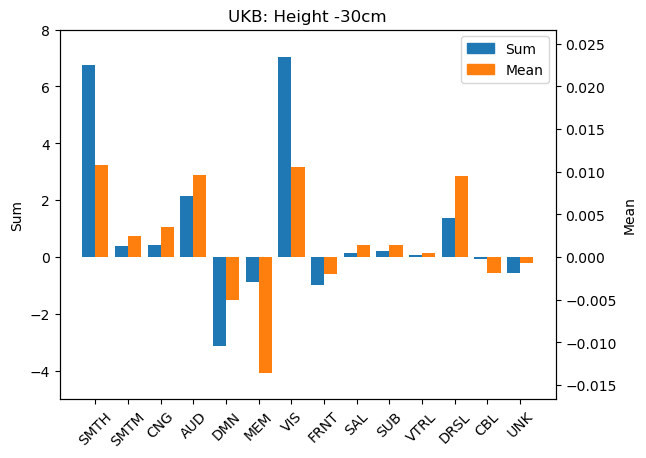

In [7]:
title = 'UKB: Height -30cm'
sums = '''6.75188145286365
0.37333520014592336
0.424251338917328
2.140619439027663
-3.114516047005009
-0.8821975331634127
7.036460183109996
-0.9830540676044878
0.12963849887439843
0.206123439545776
0.05836989226186573
1.3833526968110654
-0.06664850782044074
-0.5528718511179425'''.split()
sums = [float(s) for s in sums]
means = '''0.010783611778367373
0.002432703639926415
0.003483732812156799
0.009642435659408297
-0.005051519600630814
-0.013597378151382709
0.01053453885194895
-0.0019652585663753287
0.0014235150133422364
0.001397330388090566
0.0005162434730172018
0.009531316083157227
-0.0018554555196620458
-0.0007051936876504368'''.split()
means = [float(m) for m in means]
lim = [-5, 8]

makefig(title, sums, means, lim, 'UKB')

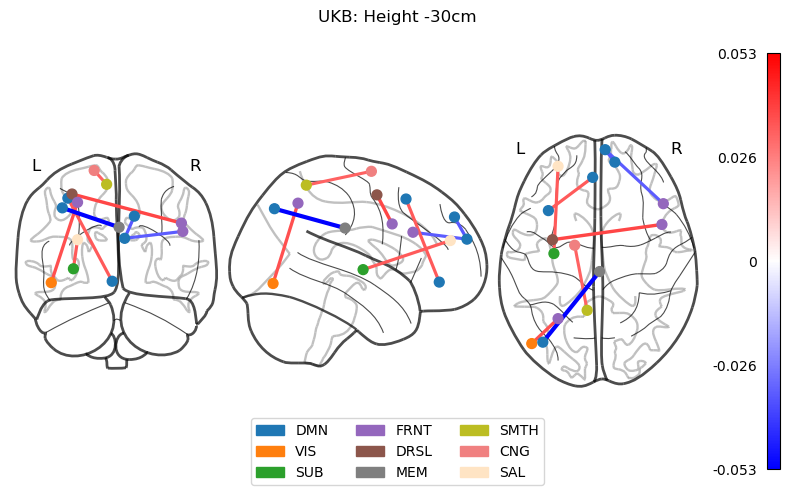

In [10]:
title = 'UKB: Height -30cm'
top_edges = '''16621 73 124 DMN MEM -0.052673482638951025
29829 164 228 FRNT DRSL 0.03801548604322038
26620 136 169 VIS FRNT 0.035973878221102505
19319 88 92 DMN DMN -0.03447076180850082
32176 192 209 SAL SUB 0.03388668244645088
18971 86 95 DMN DMN 0.03386534718524083
20074 92 157 DMN FRNT -0.03341261009481485
37 0 38 SMTH CNG 0.03236645179885984'''

makefigedges(title, top_edges, 'UKB')

/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


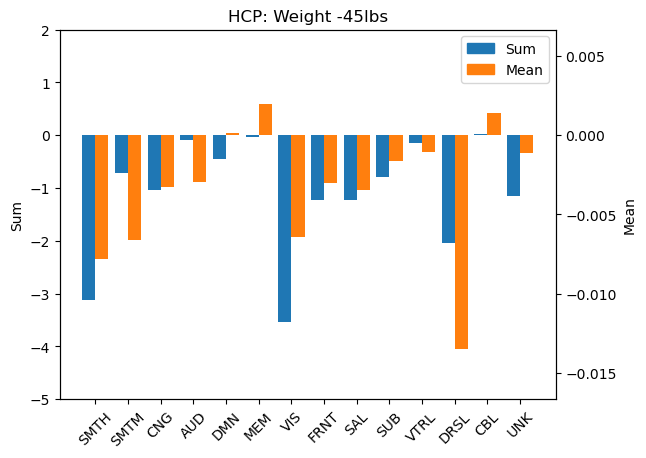

In [13]:
title = 'HCP: Weight -45lbs'
sums = '''-3.1208904554307932
-0.7153438984891125
-1.0443261997854765
-0.09821905946929829
-0.45039349832969117
-0.031250073801744785
-3.541442006727826
-1.236811493671315
-1.232090920002976
-0.7873478098284703
-0.1538148764315037
-2.041914147055469
0.019548613879932897
-1.157915432105735'''.split()
sums = [float(s) for s in sums]
means = '''-0.007794506449571323
-0.006617010637765791
-0.0033051354209685285
-0.0029897784229587334
0.00014730318690375836
0.0019516047174350315
-0.006431036243298165
-0.0030001950721298652
-0.0034347542966050807
-0.0016181415889193742
-0.001076722709395855
-0.013508977077543277
0.0014004090810605654
-0.001125126439606279'''.split()
means = [float(m) for m in means]
lim = [-5, 2]

makefig(title, sums, means, lim, 'HCP')

/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


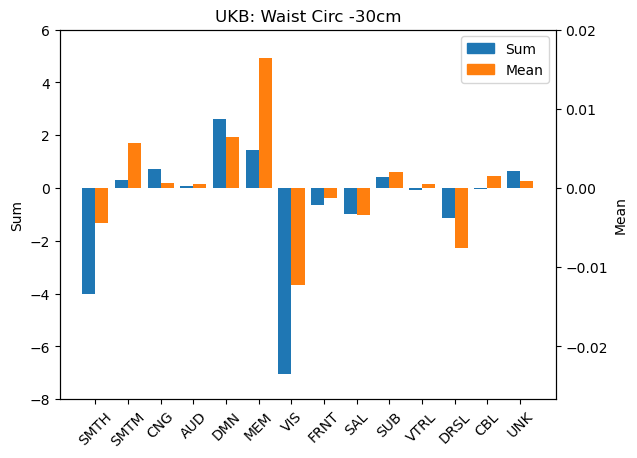

In [17]:
title = 'UKB: Waist Circ -30cm'
sums = '''-4.028065357321873
0.3166521578468763
0.7044998530334503
0.08042948908247391
2.627618526462829
1.4449540022892888
-7.0535932149454705
-0.6291883119324823
-0.9908671090154426
0.40440565452155186
-0.0910184174647646
-1.1280617183295392
-0.0525496550117846
0.6522544439594375'''.split()
sums = [float(s) for s in sums]
means = '''-0.004394533695215735
0.005646826112779314
0.0006106997824052219
0.000475090906386763
0.006419886919349103
0.016428856011990477
-0.012275908031677595
-0.001277713253355048
-0.0034675120604413393
0.001964248237010175
0.0004699993948277439
-0.007563689666245409
0.001531336648964452
0.000831957198927854'''.split()
means = [float(m) for m in means]
lim = [-8, 6]

makefig(title, sums, means, lim, 'UKB')

/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


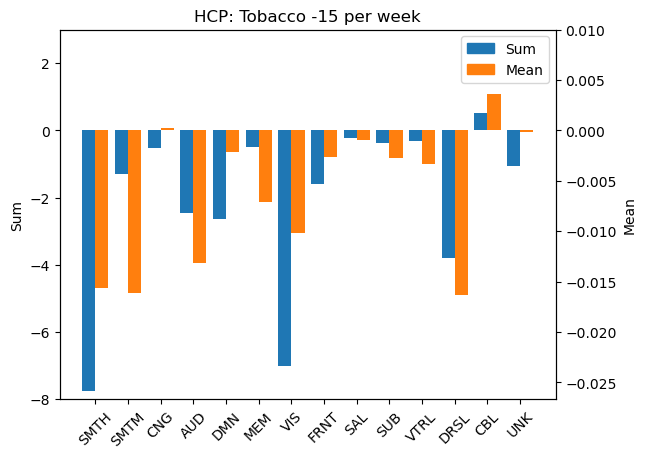

In [19]:
title = 'HCP: Tobacco -15 per week'
sums = '''-7.745159555232332
-1.2983087648964065
-0.5302307628365057
-2.4653522658635607
-2.638829564018039
-0.49639320961346267
-7.00190912781088
-1.5856452031573358
-0.22261621773861562
-0.386436166123725
-0.3201219578972088
-3.808177131711588
0.5131026538585208
-1.0735020373632436'''.split()
sums = [float(s) for s in sums]
means = '''-0.015603207057534443
-0.01610786749913955
0.0001854097409124625
-0.013135485950914006
-0.002173604687839304
-0.007099176923268181
-0.010199551345109114
-0.0026281101700521966
-0.0009219363070153249
-0.0027278280647194788
-0.003334132912960385
-0.016345627992621584
0.0036403681527924564
-0.00020658430250905725'''.split()
means = [float(m) for m in means]
lim = [-8,3]

makefig(title, sums, means, lim, 'HCP')

/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


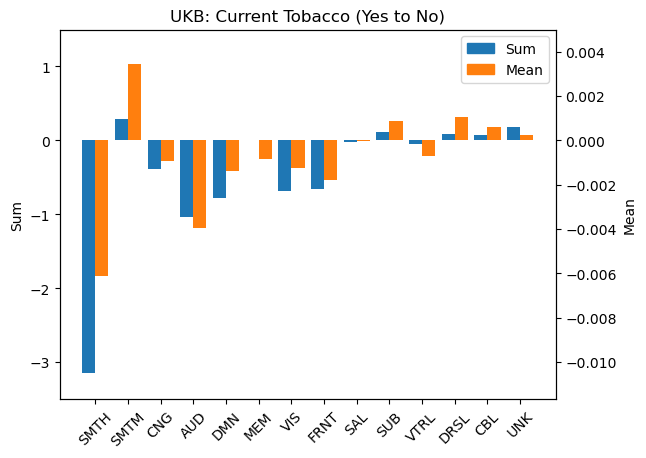

In [25]:
title = 'UKB: Current Tobacco (Yes to No)'
sums = '''-1.5736418483168577
0.1448442882277879
-0.19189963670471222
-0.5213969624954231
-0.3888184940429352
0.005974315111537232
-0.3421378277637103
-0.32999032458218525
-0.007919087994525516
0.054691521307610666
-0.022505492184861427
0.042015389206368076
0.03784487882176158
0.09167157100849524'''.split()
sums = [float(s)*2 for s in sums]
means = '''-0.0030660808076879613
0.001723813124267238
-0.00046567771598428733
-0.001968950075670662
-0.0006841834686124708
-0.0004149873099242784
-0.0006276977817812304
-0.0008896832592411274
-4.533939005951735e-06
0.0004445991979205667
-0.00035601988840622094
0.0005213362636466539
0.0003009832847672055
0.00011692802424552965'''.split()
means = [float(m)*2 for m in means]
lim = [-3.5,1.5]

makefig(title, sums, means, lim, 'UKB')

/tmp/ipykernel_197948/1257594717.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


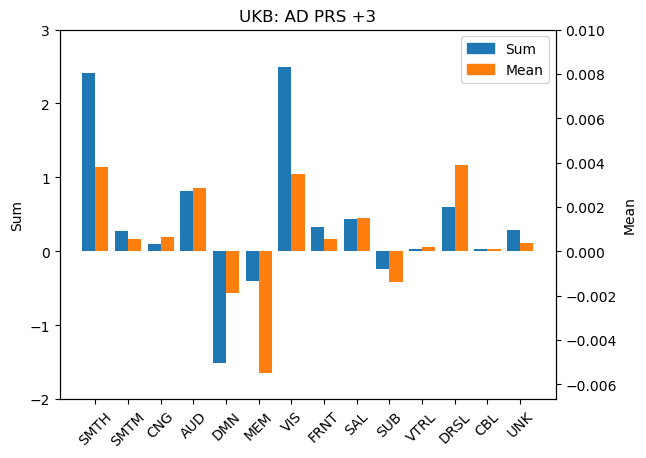

In [27]:
title = 'UKB: AD PRS +3'
sums = '''2.4067204847078387
0.27368513518926996
0.09905200684612189
0.818590384166717
-1.5051367903623956
-0.39555351172730735
2.494966058284986
0.3307734773886915
0.44133278852003655
-0.24482298045330342
0.024160840239248894
0.5973561007615608
0.03518998734437732
0.28542313830635047'''.split()
sums = [float(s) for s in sums]
means = '''0.003801321926228975
0.0005569603813054525
0.0006553393928104161
0.0028550822987106306
-0.001882850621730422
-0.005507626297944783
0.003468438997720219
0.0005578164303534466
0.0014954820588487954
-0.001374556054687195
0.00020426056365092563
0.003888228794866188
0.0001163683162827322
0.00036406012539075315'''.split()
means = [float(m) for m in means]
lim = [-2,3]

makefig(title, sums, means, lim, 'UKB')